In [61]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split,cross_val_score
import datetime as dt
import math
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [62]:
df = pd.read_csv("E:\\python\\Skyserver.csv")

In [63]:
df.head(5)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [64]:
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [65]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [66]:
df['objid'].unique()

array([1.23765e+18])

In [67]:
df['rerun'].unique()

array([301], dtype=int64)

In [68]:
#from initial analysis we can see objid and rerun column has only 1 value in it, we will drop these column

In [69]:
df.drop('objid',axis=1,inplace=True)
df.drop('rerun',axis=1,inplace=True)

<AxesSubplot:>

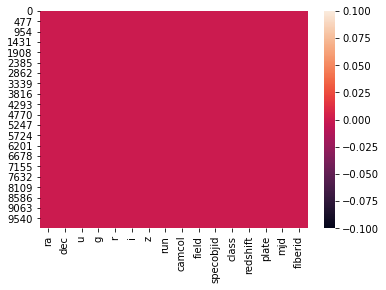

In [70]:
sns.heatmap(df.isnull())  # heatmap also indicates that there are no null values in dataset.

In [71]:
df.describe()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [72]:
#We can see that difference between mean and std is more which indicates that data is very dispersed and must contain many
#outliers.
#Difference between 25% and 50% is very less indicating that lot of data is concentrated in this part

In [73]:
#df.head(5)

In [74]:
#df.columns

ra              AxesSubplot(0.125,0.657941;0.133621x0.222059)
dec          AxesSubplot(0.285345,0.657941;0.133621x0.222059)
u             AxesSubplot(0.44569,0.657941;0.133621x0.222059)
g            AxesSubplot(0.606034,0.657941;0.133621x0.222059)
r            AxesSubplot(0.766379,0.657941;0.133621x0.222059)
i               AxesSubplot(0.125,0.391471;0.133621x0.222059)
z            AxesSubplot(0.285345,0.391471;0.133621x0.222059)
run           AxesSubplot(0.44569,0.391471;0.133621x0.222059)
camcol       AxesSubplot(0.606034,0.391471;0.133621x0.222059)
field        AxesSubplot(0.766379,0.391471;0.133621x0.222059)
specobjid          AxesSubplot(0.125,0.125;0.133621x0.222059)
redshift        AxesSubplot(0.285345,0.125;0.133621x0.222059)
plate            AxesSubplot(0.44569,0.125;0.133621x0.222059)
mjd             AxesSubplot(0.606034,0.125;0.133621x0.222059)
fiberid         AxesSubplot(0.766379,0.125;0.133621x0.222059)
dtype: object

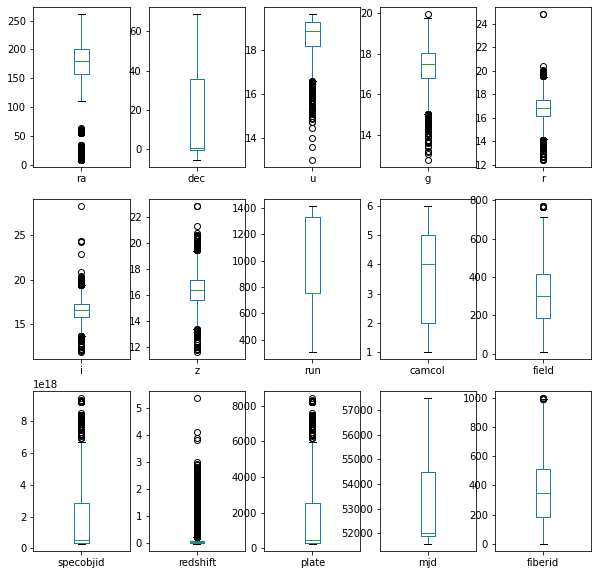

In [75]:
df.plot(kind='box',subplots=True,layout=(3,5),figsize=(10,10))

In [76]:
# We can see there are outliers present in many columns which needs to be worked upon for good model building.

In [77]:
df.skew()

ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
camcol      -0.100220
field        0.249795
specobjid    1.794627
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

In [78]:
#Above skewness indicates that data is very slightly disperse/skewed

In [79]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['class']=le.fit_transform(df['class'])
df['class']

0       2
1       2
2       0
3       2
4       2
       ..
9995    0
9996    0
9997    2
9998    0
9999    0
Name: class, Length: 10000, dtype: int32

In [80]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.16745842, 0.58492272, 1.03148637, ..., 1.03148936, 1.30931064,
        0.66863177],
       [0.16886159, 0.58311429, 0.05243046, ..., 0.63621258, 0.87919741,
        0.91101156],
       [0.17057433, 0.58347525, 0.92156796, ..., 0.65633905, 0.60919097,
        0.77527888],
       ...,
       [0.92039468, 1.46090664, 0.16753826, ..., 3.26608697, 2.69309363,
        1.3036668 ],
       [0.92197294, 1.46432109, 0.31801835, ..., 0.56688806, 0.70581092,
        0.60143828],
       [0.91804124, 1.46639319, 0.79229193, ..., 0.56688806, 0.70581092,
        0.5820479 ]])

In [81]:
data_new = df[(z<3).all(axis = 1)]

In [82]:
data_new.shape

(8698, 16)

In [83]:
df = data_new #Here we are assigning new data set after removing outlier from z score technique to orginal dataset name 

ra               AxesSubplot(0.125,0.71587;0.168478x0.16413)
dec           AxesSubplot(0.327174,0.71587;0.168478x0.16413)
u             AxesSubplot(0.529348,0.71587;0.168478x0.16413)
g             AxesSubplot(0.731522,0.71587;0.168478x0.16413)
r               AxesSubplot(0.125,0.518913;0.168478x0.16413)
i            AxesSubplot(0.327174,0.518913;0.168478x0.16413)
z            AxesSubplot(0.529348,0.518913;0.168478x0.16413)
run          AxesSubplot(0.731522,0.518913;0.168478x0.16413)
camcol          AxesSubplot(0.125,0.321957;0.168478x0.16413)
field        AxesSubplot(0.327174,0.321957;0.168478x0.16413)
specobjid    AxesSubplot(0.529348,0.321957;0.168478x0.16413)
class        AxesSubplot(0.731522,0.321957;0.168478x0.16413)
redshift           AxesSubplot(0.125,0.125;0.168478x0.16413)
plate           AxesSubplot(0.327174,0.125;0.168478x0.16413)
mjd             AxesSubplot(0.529348,0.125;0.168478x0.16413)
fiberid         AxesSubplot(0.731522,0.125;0.168478x0.16413)
dtype: object

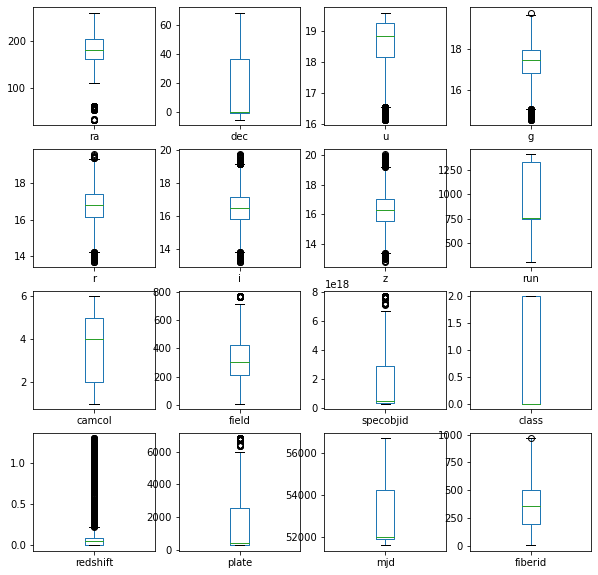

In [84]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(10,10))

In [85]:
df.columns

Index(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol', 'field',
       'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

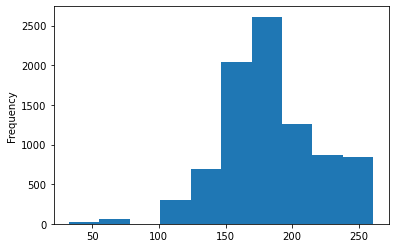

In [86]:
df['ra'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

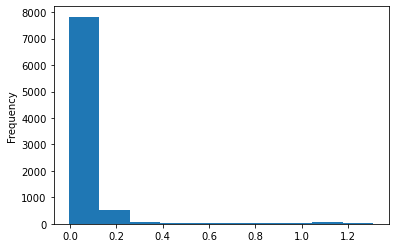

In [87]:
df['redshift'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

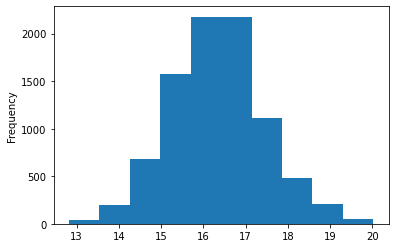

In [88]:
df['z'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

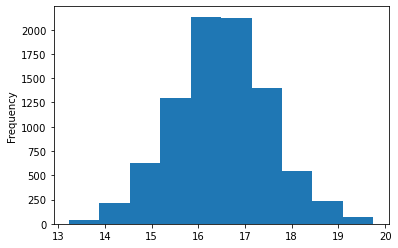

In [89]:
df['i'].plot.hist()

In [90]:
# columns 'z' and 'i' are not skewed and we can see bell shaped curve being formed indicating that data is normally distributed
#in these columns.

<AxesSubplot:ylabel='Frequency'>

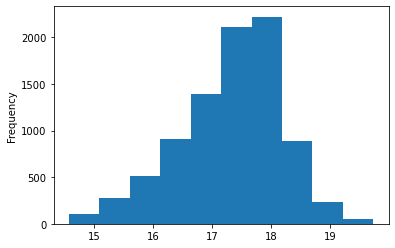

In [91]:
df['g'].plot.hist()

In [92]:
#From above figures we can see that few columns have left or right skewness in them.

In [93]:
y = df.iloc[:,11]

In [94]:
y.shape

(8698,)

In [95]:
x = df.drop('class',axis=1)

In [96]:
x.shape

(8698, 15)

In [97]:
x.skew()

ra          -0.130951
dec          1.212911
u           -0.981103
g           -0.528033
r           -0.153454
i            0.055966
z            0.167256
run          0.518602
camcol      -0.141193
field        0.220032
specobjid    1.320102
redshift     4.951700
plate        1.320088
mjd          0.963989
fiberid      0.065374
dtype: float64

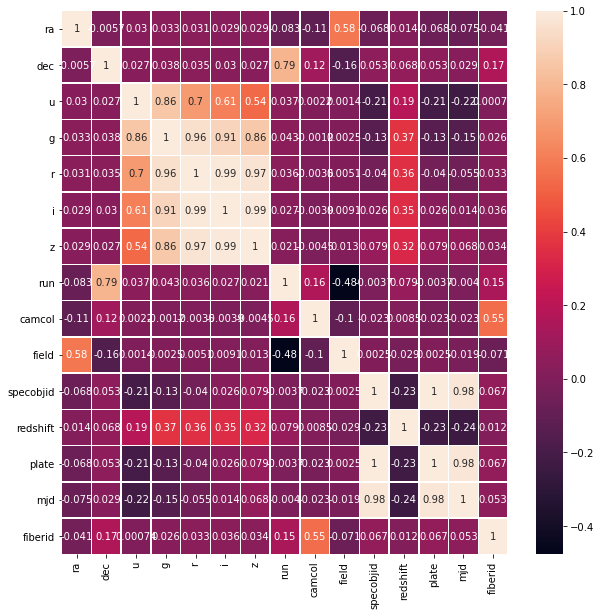

In [98]:
corr= x.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,linewidths=.5)
plt.show()

In [99]:
#Above heatmap indicates that columns 'specobjid', 'redshift', 'plate', 'mjd', are very negatively correlated with each other
#'columns u', 'g', 'r', 'i', 'z' are positively correlated with each other

In [100]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [101]:
x=scale.fit_transform(x)

In [102]:
x.shape

(8698, 15)

In [103]:
y.shape

(8698,)

In [104]:
from sklearn.preprocessing import power_transform
x= power_transform(x, method = 'yeo-johnson')

In [105]:
models = [KNeighborsClassifier(),DecisionTreeClassifier(),SVC(),RandomForestClassifier()]
max_score = 0
for i in range(1,100):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=i)
    for j in models:
        j.fit(train_x,train_y)
        pred=j.predict(test_x)
        temp_score=accuracy_score(pred,test_y)
        if temp_score > max_score:
            max_score = temp_score
            final_temp_state = i
            best_model = j
print("Best accuracy score is:",max_score,"of model:",best_model,"with best random state value is:",final_temp_state)

Best accuracy score is: 0.9942528735632183 of model: RandomForestClassifier() with best random state value is: 95


In [106]:
rfc=RandomForestClassifier(n_estimators=100)
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=final_temp_state)
rfc.fit(train_x,train_y)
predrfc = rfc.predict(test_x)
#print("Predicted values using SVC model:\n",predsvc)
#print("Actul values are:", test_y)
print("Accuracy score:",accuracy_score(predrfc,test_y))
print("Confusion matrix:\n", confusion_matrix(test_y, predrfc))
print("Classification report:",classification_report(test_y,predrfc))
print("Random state used is:",final_temp_state )

Accuracy score: 0.9942528735632183
Confusion matrix:
 [[977   2   3]
 [  5  62   0]
 [  0   0 691]]
Classification report:               precision    recall  f1-score   support

           0       0.99      0.99      0.99       982
           1       0.97      0.93      0.95        67
           2       1.00      1.00      1.00       691

    accuracy                           0.99      1740
   macro avg       0.99      0.97      0.98      1740
weighted avg       0.99      0.99      0.99      1740

Random state used is: 95


In [107]:
cross_score=cross_val_score(rfc,x,y,cv=5)
print("Cross validation score is=",cross_score)
print("Cross validation mean score is=",cross_score.mean())
print("Cross validation standard deviation score is=",cross_score.std())

Cross validation score is= [0.98735632 0.98965517 0.9908046  0.98332375 0.99022427]
Cross validation mean score is= 0.9882728216110461
Cross validation standard deviation score is= 0.0027372325832478485


In [108]:
#Accuracy score and cross valuidation mean score indicates that using randonforrect classifier, our model is giving good result.
#We will further use ensemble technique to boost our model performance.

In [109]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [110]:
abc = AdaBoostClassifier(n_estimators=50,base_estimator=rfc,learning_rate=1,algorithm='SAMME')
#dtc=DecisionTreeClassifier()
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=final_temp_state)
abc.fit(train_x,train_y)
predabc = abc.predict(test_x)
print("Accuracy score:",accuracy_score(predabc,test_y))

Accuracy score: 0.9948275862068966


In [111]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
temp_score = 0
temp_rate = 0
for i in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=50, learning_rate=i, max_features=2, max_depth=2, random_state=final_temp_state)
    gb_clf.fit(train_x,train_y)   
    score = gb_clf.score(test_x, test_y)
    if score > temp_score:
        temp_score = score
        temp_rate = i
print("Best learnin rate is:",temp_rate)
print("Best learning score is:",temp_score)

Best learnin rate is: 0.25
Best learning score is: 0.9925287356321839


In [112]:
gb_clf = GradientBoostingClassifier(n_estimators=50, learning_rate=temp_rate, max_features=2, max_depth=2, random_state=final_temp_state)
gb_clf.fit(train_x,train_y)
predgb = gb_clf.predict(test_x)
#score = gb_clf.score(test_x, test_y)
print("Accuracy score:",accuracy_score(predgb,test_y))

Accuracy score: 0.9925287356321839


In [113]:
cross_score=cross_val_score(abc,x,y,cv=5)
print("Cross validation score is=",cross_score)
print("Cross validation mean score is=",cross_score.mean())
print("Cross validation standard deviation score is=",cross_score.std())

Cross validation score is= [0.98735632 0.99022989 0.98965517 0.98389879 0.98907418]
Cross validation mean score is= 0.9880428704566636
Cross validation standard deviation score is= 0.002284332850857003


In [114]:
from sklearn.metrics import roc_auc_score,roc_curve

[0.00000000e+00 5.97728631e-04 1.19545726e-03 1.00000000e+00]
[0.         0.92537313 0.92537313 1.        ]
[1.45186276 0.45186276 0.28958913 0.27406862]


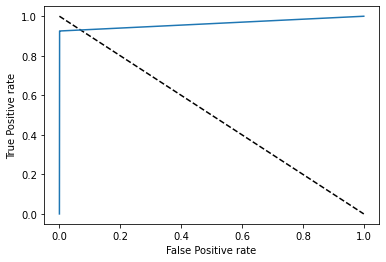

In [115]:
probability = abc.predict_proba(test_x)[:,1]
probability
fpr,tpr,threshold = roc_curve(test_y,probability,pos_label=True)
print(fpr)
print(tpr)
print(threshold)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = "GradientBoostClassifier")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.show()

In [116]:
#Accuracy score, cross validation mean score and even AUC ROC curve indicates that AdaBoostClassifier algorithm is giving the 
#best result to our model and hence we will use AdaBoostClassifier in our final object

In [117]:
output_data_abc=pd.DataFrame(predabc)
output_data_abc.to_csv("E:\\python\\space_prediction.csv",header=0)

In [118]:
import pickle
filename = 'E:\\python\\space_prediction.pkl'
pickle.dump(abc,open(filename,'wb'))